In [1]:
import pandas as pd
import numpy as np
# Estaqblecer la visualizacion de todas las columnas
pd.set_option('display.max_columns', None)

# Establecer el formato para números de punto flotante
pd.options.display.float_format = lambda x: '%.4f' % x

# Paquetes d visualización
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
sys.path.append('..')
from src import soporte_analisis as sp
from src import sp_visualizacin as spv

In [2]:
df=pd.read_csv('../data/nulos_categoricas.csv', parse_dates=['date'])
df.head()

,campaign_id,company,campaign_type,duration,channel_used,conversion_rate,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,total($),genre,ages,year,month,day_name,quarter
0,1,innovate industries,Unknow,30.0000,google ads,0.0404,6.2900,chicago,spanish,NaN,19221922.0000,66.0000,health & wellness,2021-01-01,16174.0000,men,18-24,2021.0000,1.0000,friday,1.0000
1,2,nexgen systems,email,60.0000,google ads,0.1212,5.6100,new york,german,116.0000,7523.0000,7.0000,fashionistas,2021-01-02,11566.0000,women,35-44,2021.0000,1.0000,saturday,1.0000
2,3,alpha innovations,influencer,30.0000,youtube,0.0707,7.1800,los angeles,french,NaN,7698.0000,11.0000,outdoor adventurers,2021-01-03,10200.0000,men,25-34,2021.0000,1.0000,sunday,1.0000
3,4,Unknow,display,60.0000,youtube,0.1111,NaN,miami,mandarin,217.0000,NaN,7.0000,health & wellness,2021-01-04,12724.0000,Unknow,all_ages,2021.0000,1.0000,monday,1.0000
4,5,nexgen systems,email,15.0000,youtube,0.0505,66.5500,los angeles,Unknow,379379.0000,4201.0000,33.0000,health & wellness,2021-01-05,16452.0000,men,25-34,2021.0000,1.0000,tuesday,1.0000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   campaign_id       209915 non-null  int64         
 1   company           209915 non-null  object        
 2   campaign_type     209915 non-null  object        
 3   duration          191309 non-null  float64       
 4   channel_used      209915 non-null  object        
 5   conversion_rate   200471 non-null  float64       
 6   roi               173439 non-null  float64       
 7   location          209915 non-null  object        
 8   language          209915 non-null  object        
 9   clicks            178736 non-null  float64       
 10  impressions       188467 non-null  float64       
 11  engagement_score  186051 non-null  float64       
 12  customer_segment  209915 non-null  object        
 13  date              203007 non-null  datetime64[ns]
 14  tota

In [4]:
sp.valores_minuscula(df)
df.sample(5)

,campaign_id,company,campaign_type,duration,channel_used,conversion_rate,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,total($),genre,ages,year,month,day_name,quarter
202938,182921,techcorp,display,15.0000,email,0.0606,55.0101,los angeles,french,NaN,32573257.0000,1.0000,health & wellness,2021-02-25,11869.0000,men,18-24,2021.0000,2.0000,thursday,1.0000
45098,45099,innovate industries,search,60.0000,instagram,0.0500,22.7676,miami,german,525.0000,99139913.0000,1010.0000,tech enthusiasts,2021-07-23,12461.0000,women,25-34,2021.0000,7.0000,friday,3.0000
10085,10086,techcorp,display,45.0000,facebook,0.1400,5.0700,los angeles,french,NaN,88618861.0000,7.0000,health & wellness,2021-08-19,5384.0000,women,25-34,2021.0000,8.0000,thursday,3.0000
180877,180878,datatech solutions,display,15.0000,facebook,0.0200,44.9494,houston,english,648648.0000,NaN,77.0000,unknow,2021-07-22,13103.0000,unknow,all_ages,2021.0000,7.0000,thursday,3.0000
116120,116121,nexgen systems,display,45.0000,instagram,0.0909,33.7979,los angeles,french,474.0000,6966.0000,77.0000,health & wellness,2021-02-20,10064.0000,unknow,unknow,2021.0000,2.0000,saturday,1.0000


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
campaign_id,209915.0000,100015.0741,1.0000,50013.5000,100018.0000,150065.5000,200000.0000,57747.9842
duration,191309.0000,37.5035,15.0000,30.0000,30.0000,45.0000,60.0000,16.7443
conversion_rate,200471.0000,0.0808,0.0100,0.0500,0.0808,0.1200,0.1515,0.0410
roi,173439.0000,27.5304,2.0000,5.0100,8.0000,55.0000,88.0000,26.1923
clicks,178736.0000,280253.2882,100.0000,552.0000,101101.0000,548548.0000,10001000.0000,399127.9838
impressions,188467.0000,27614356.6920,1000.0000,5508.0000,9996.0000,55235523.0000,1000010000.0000,34140998.4982
engagement_score,186051.0000,77.9064,1.0000,5.0000,10.0000,66.0000,1010.0000,215.8253
date,203007,2021-07-02 01:11:59.851039744,2021-01-01 00:00:00,2021-04-02 00:00:00,2021-07-02 00:00:00,2021-10-01 00:00:00,2021-12-31 00:00:00,NaN
total($),201832.0000,12503.9995,5000.0000,8740.0000,12496.0000,16261.0000,20000.0000,4338.1943
year,203007.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000,0.0000


In [6]:
col_num= df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar= ['campaign_id', 'year', 'month', 'quarter']
for col in lista_eliminar:
  col_num.remove(col)
  

In [7]:
df[col_num].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,191309.0000,37.5035,16.7443,15.0000,30.0000,30.0000,45.0000,60.0000
conversion_rate,200471.0000,0.0808,0.0410,0.0100,0.0500,0.0808,0.1200,0.1515
roi,173439.0000,27.5304,26.1923,2.0000,5.0100,8.0000,55.0000,88.0000
clicks,178736.0000,280253.2882,399127.9838,100.0000,552.0000,101101.0000,548548.0000,10001000.0000
impressions,188467.0000,27614356.6920,34140998.4982,1000.0000,5508.0000,9996.0000,55235523.0000,1000010000.0000
engagement_score,186051.0000,77.9064,215.8253,1.0000,5.0000,10.0000,66.0000,1010.0000
total($),201832.0000,12503.9995,4338.1943,5000.0000,8740.0000,12496.0000,16261.0000,20000.0000


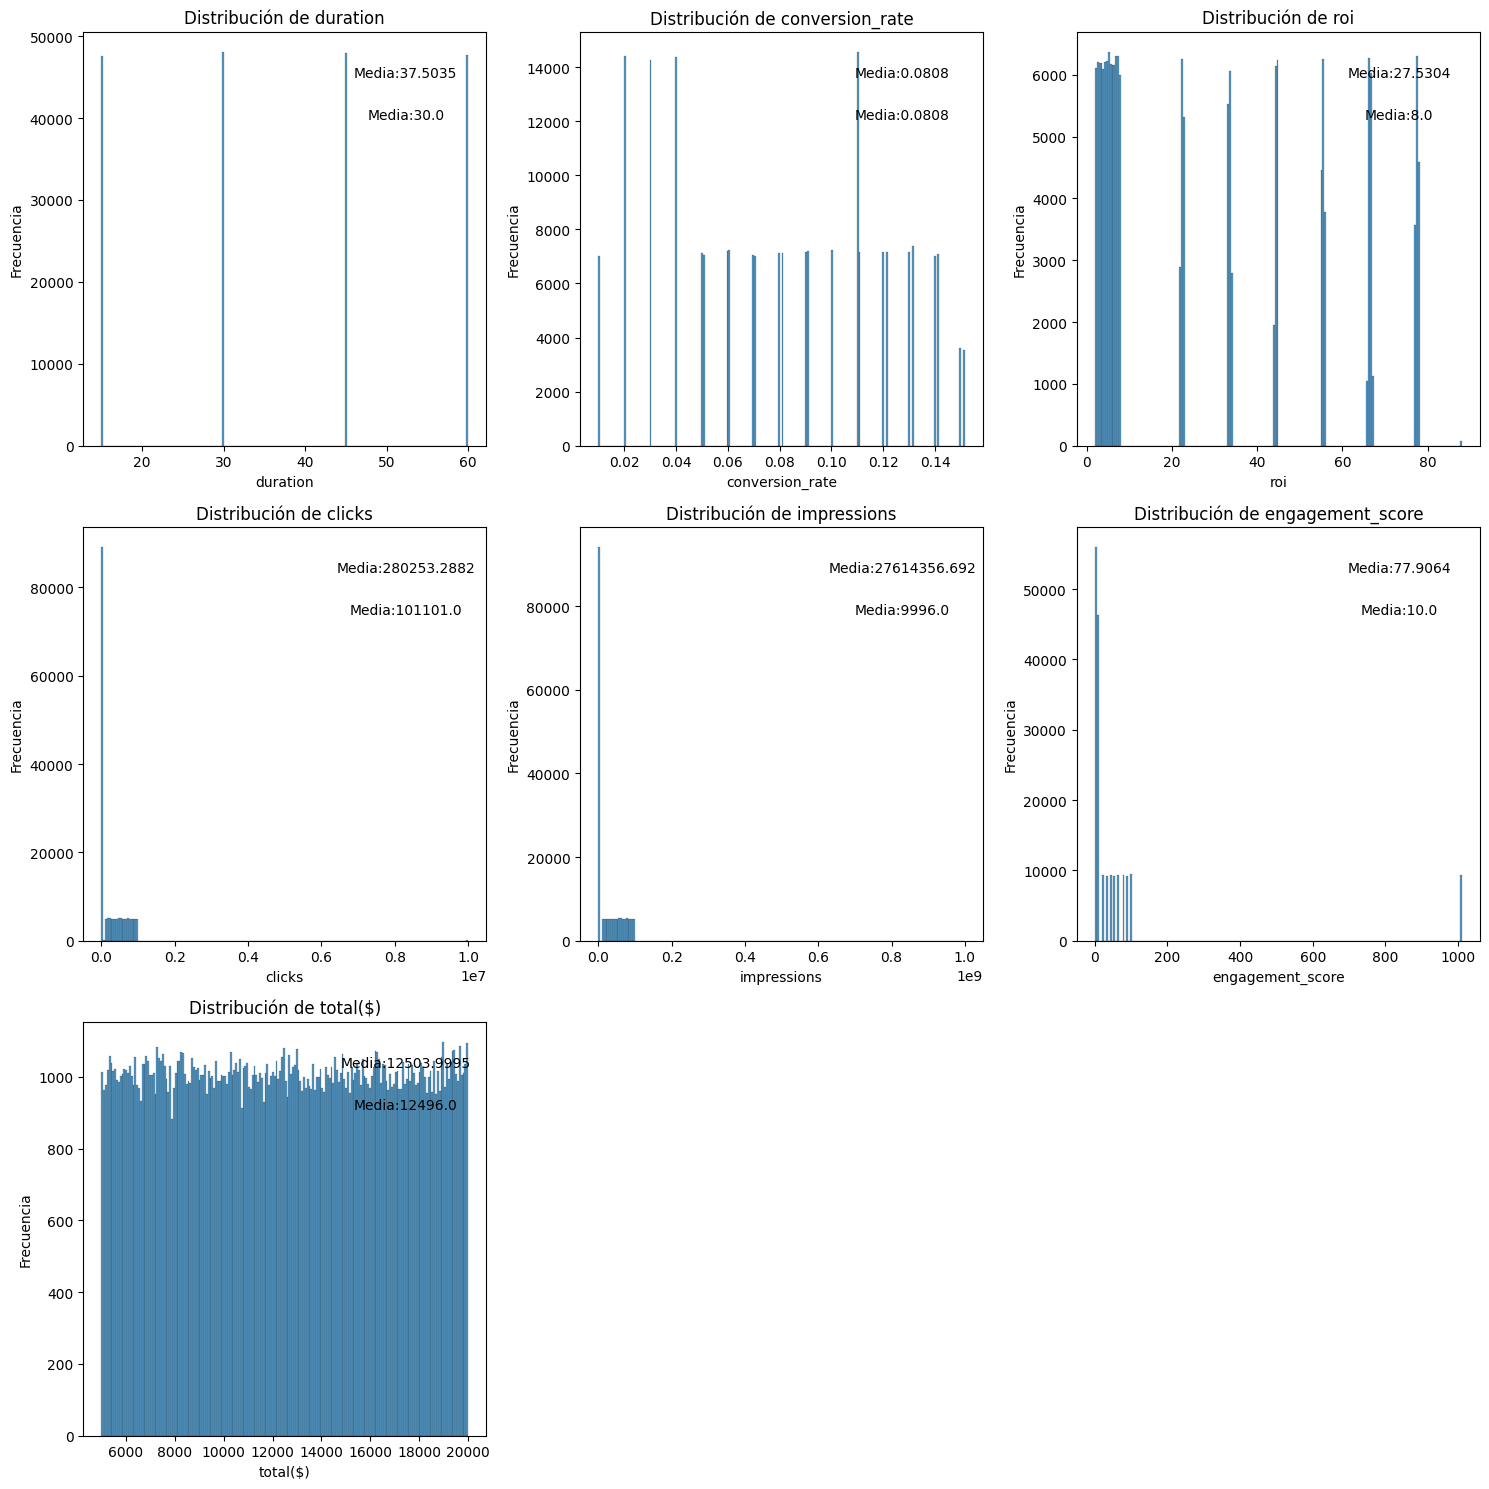

In [8]:
num_graph = len(col_num)
num_rows= (num_graph + 2) //3

fig, axes= plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axes= axes.flatten()
for i, col in enumerate(col_num):
  sns.histplot(data=df, x= col, ax= axes[i], bins= 200)
  axes[i].text(0.8,0.9, f'Media:{round(df[col].mean(),4)}', horizontalalignment='center', verticalalignment='center',transform=axes[i].transAxes)
  axes[i].text(0.8,0.8, f'Media:{df[col].median()}', horizontalalignment='center', verticalalignment='center',transform=axes[i].transAxes)

  axes[i].set_title(f'Distribución de {col}')
  axes[i].set_ylabel('Frecuencia')
  
for j in range (i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

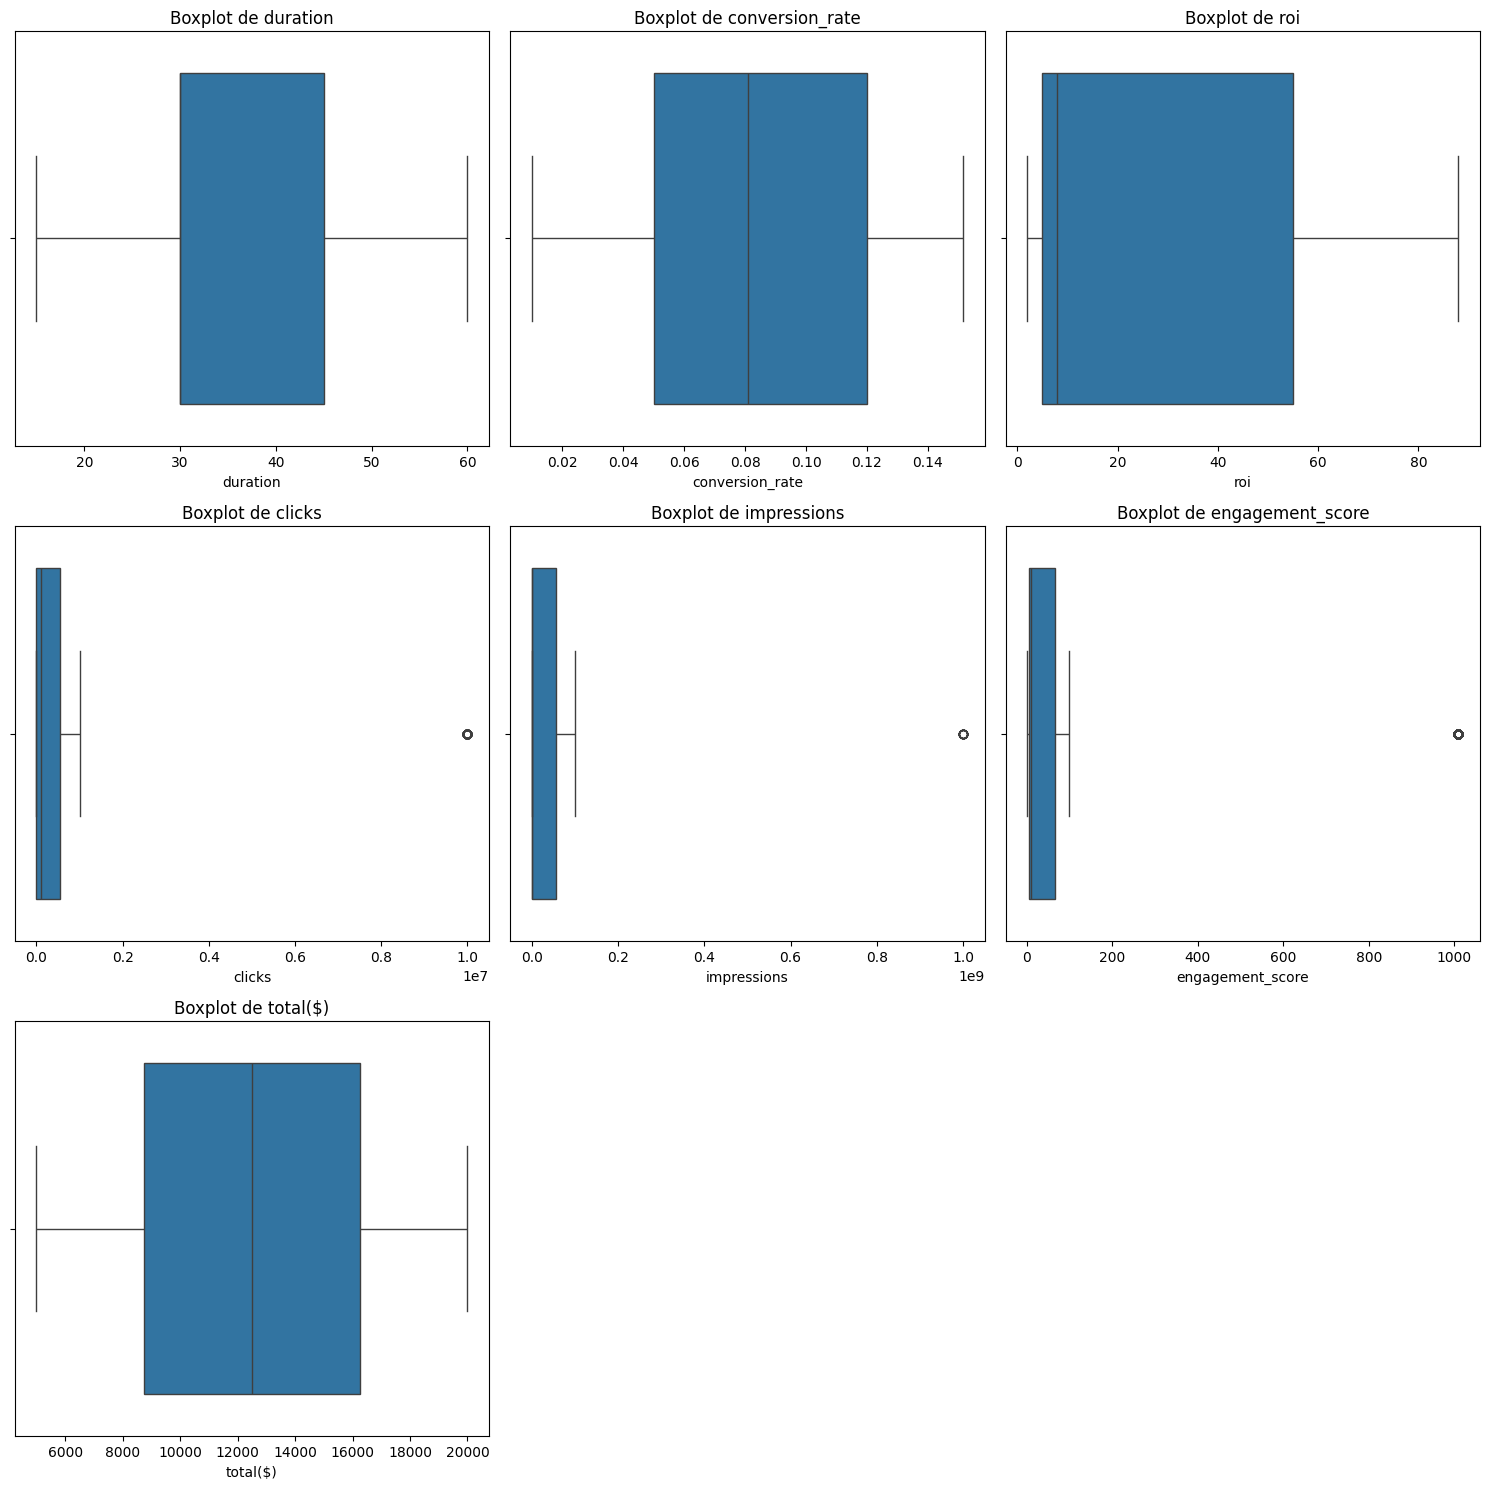

In [9]:
num_graph = len(col_num)
num_rows= (num_graph + 2) //3

fig, axes= plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axes= axes.flatten()
for i, col in enumerate(col_num):
  sns.boxplot(data=df, x= col, ax= axes[i])

  axes[i].set_title(f'Boxplot de {col}')

for j in range (i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

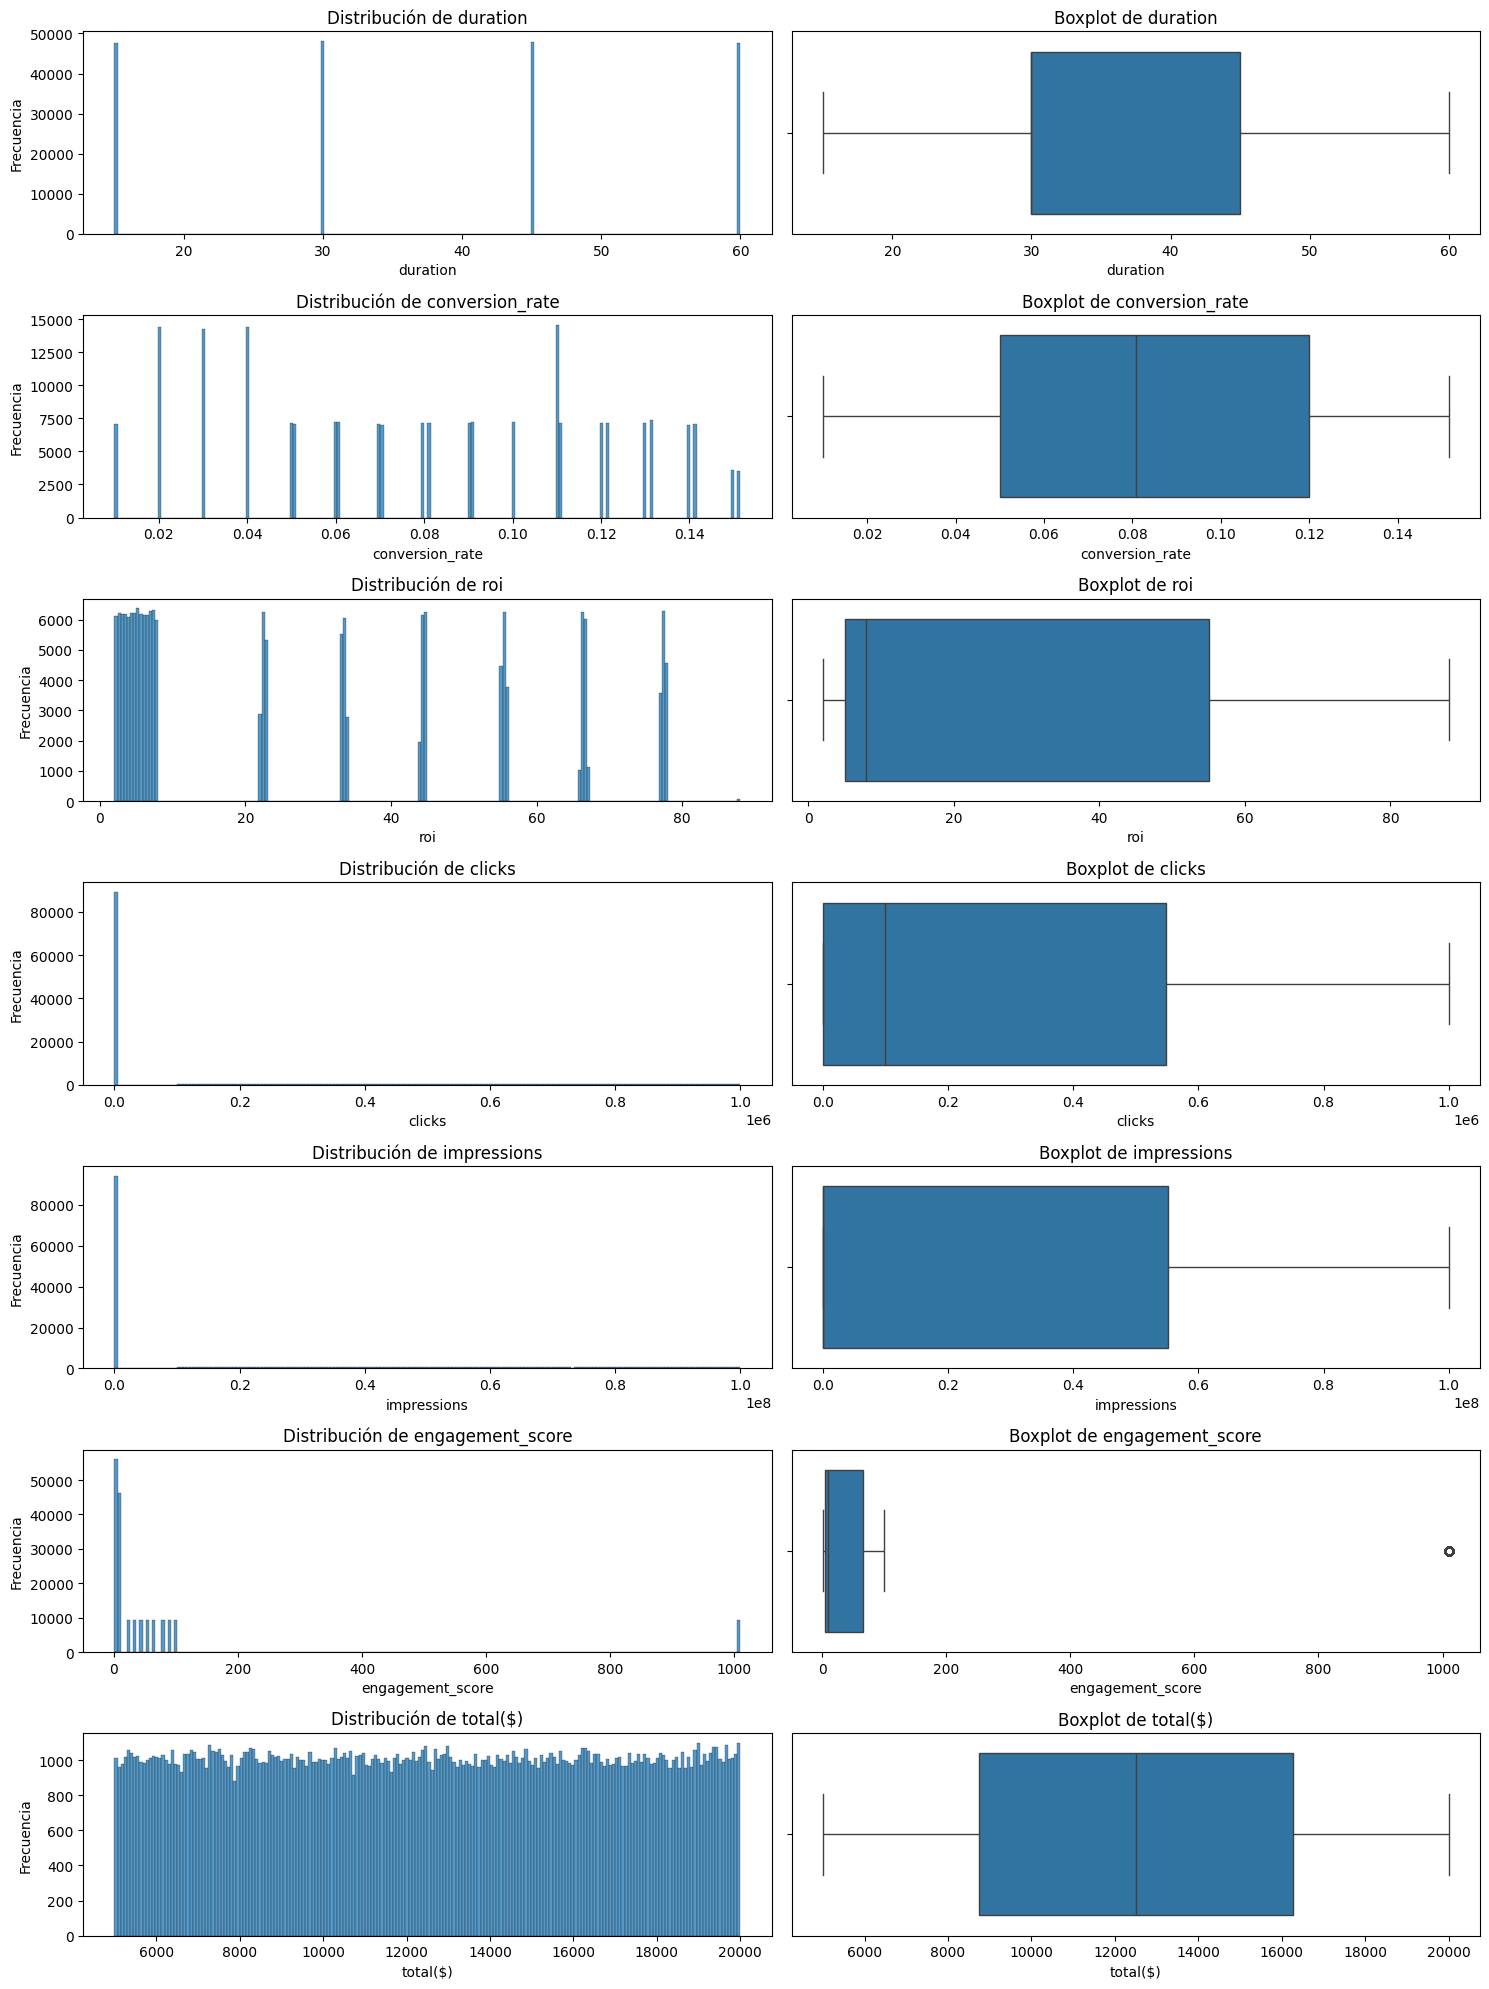

In [16]:
spv.subplot_col_num (df, col_num)
  

# Gestión de outliers, como se ha podido ver que tenemos outlier vamos a sacar la cantidad exacta para ver si se pueden eliminar o no.


In [11]:
df['impressions'][df['impressions']>800000000].count()

np.int64(14)

In [12]:
# Para poder realizar el estudio de todas la variable es conveniente hacer un diccionario con las condiciones de cada una.add()
dicc_outliers= {'impressions': 800000000,
                'clicks': 8000000,
                'engagement_score': 800}

In [13]:
for col, out in dicc_outliers.items():
  outliers=df[col][df[col]>out].count()
  print(f'Para la columna{col.upper()} tenemos {outliers}, lo que representa un {round(outliers/df.shape[0]*100,4)} % de los valores')

Para la columnaIMPRESSIONS tenemos 14, lo que representa un 0.0067 % de los valores
Para la columnaCLICKS tenemos 95, lo que representa un 0.0453 % de los valores
Para la columnaENGAGEMENT_SCORE tenemos 9284, lo que representa un 4.4227 % de los valores


In [14]:
df['clicks']=df['clicks'].apply(lambda x :np.nan if x >8000000 else x )
df['impressions']=df['impressions'].apply(lambda x :np.nan if x >800000000 else x )

In [15]:
df.to_csv('../data/col_numericas_outliers.csv', index=False)